In [1]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np
from gtts import gTTS 
import os 
from IPython.display import Audio
from googletrans import Translator

# Reading multiple lines of image

In [2]:
IMAGE_PATH = ('C:\\Users\\Niyoshi soni\\Desktop\\final year project\\try2.jpg')
translator = Translator()

In [3]:
reader = easyocr.Reader(['en'])
result = reader.readtext(IMAGE_PATH)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[314, 77], [925, 77], [925, 166], [314, 166]],
  'Animated Neon',
  0.9954020768907226),
 ([[163, 243], [1132, 243], [1132, 488], [163, 488]],
  'ENERGY',
  0.9996920733068341),
 ([[414, 568], [833, 568], [833, 655], [414, 655]],
  'Text Effect',
  0.8016125345924103)]

In [4]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

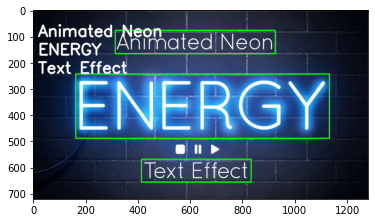

In [5]:
img = cv2.imread(IMAGE_PATH)
spacer = 100
for detection in result: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(20,spacer), font, 2,(255,255,255),5,cv2.LINE_AA)
    spacer+=70
    
plt.imshow(img)
plt.show()

In [6]:
text_list = reader.readtext('C:\\Users\\Niyoshi soni\\Desktop\\final year project\\try2.jpg', detail = 0)
text_list

['Animated Neon', 'ENERGY', 'Text Effect']

In [7]:
text_comb=' '.join(text_list) 
text_comb

'Animated Neon ENERGY Text Effect'

In [8]:
ta_tts=gTTS(text_comb)
ta_tts.save('trans.mp3')

In [14]:
Audio('trans.mp3' , autoplay=True)

In [19]:
print(translator.detect(text_comb))

Detected(lang=en, confidence=1)


In [20]:
text_es=translator.translate(text_comb, src='en' ,dest='es')
print(text_es.text)

Efecto de texto de energía de neón animado


In [21]:
ta_tts=gTTS(text_es.text)
ta_tts.save('transs.mp3')

In [22]:
Audio('transs.mp3' , autoplay=True)

# Reading only one word of image

In [14]:
IMAGE_PATH1 = ('C:\\Users\\Niyoshi soni\\Desktop\\final year project\\maxresdefault.jpg')

In [15]:
reader = easyocr.Reader(['en'])
result = reader.readtext(IMAGE_PATH1)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[114, 229], [1170, 229], [1170, 482], [114, 482]],
  'GALAXY',
  0.8373415332728341)]

In [16]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

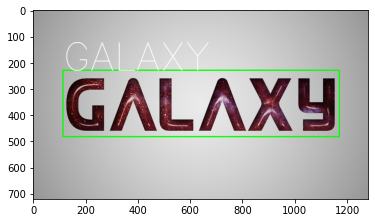

In [17]:
img = cv2.imread(IMAGE_PATH1)
img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
img = cv2.putText(img,text,top_left, font, 5,(255,255,255),2,cv2.LINE_AA)
plt.imshow(img)
plt.show()

In [18]:
text_list1 = reader.readtext('C:\\Users\\Niyoshi soni\\Desktop\\final year project\\maxresdefault.jpg', detail = 0)
text_list1

['GALAXY']

In [19]:
text_comb1=' '.join(text_list1) 
text_comb1

'GALAXY'

In [20]:
#ta_tts1=gTTS(text_comb1)
#ta_tts1.save('trans.mp3')

In [21]:
#Audio('trans.mp3' , autoplay=True)

In [22]:
print(translator.detect(text_comb1))

Detected(lang=en, confidence=0.76753247)


In [23]:
text_es1=translator.translate(text_comb1, src='en' ,dest='es')
print(text_es1.text)

GALAXIA


In [24]:
ta_tts=gTTS(text_es1.text, lang='es')
ta_tts.save('transss.mp3')

In [25]:
Audio('transss.mp3' , autoplay=True)

# Reading a PDF

In [26]:
import PyPDF2
from gtts import gTTS

In [27]:
pdfFileObj = open("C:\\Users\\Niyoshi soni\\Desktop\\final year project\\try1.pdf", "rb")
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

In [28]:
mytext = ""

In [29]:
for pageNum in range(pdfReader.numPages):
    pageObj = pdfReader.getPage(pageNum)

In [30]:
mytext += pageObj.extractText()
print(mytext)
pdfFileObj.close()

Niyoshi Soni
 
 
 
From works of historians and 
palaeographers
 
there are 
many historical handwritten collections that 
have been par
tially transcribed. These existing transcripts, are a very valuable resource for training 
models that can be used for automatic handwriting text recognition (HTR), or indexing by means of 
keyword s
potting (KWS), of the remaining 
transcribed
 
parts of these collections. However, since 
these transcripts were generated for dif
ferent purposes, its use for HTR or KWS entails some 
challenges. One problem is the alignment of manuscript and transcript tex
t: paging information from 
the original document is generally missing, transcriber notes are often added to the actual 
transcripts, parts of the manuscript are left untranscribed, etc. A different kind of problem comes 
from the changes that transcribers ha
ve introduced with respect to what was actually written in the 
original manuscript. Examples of types of changes are: expansion of abbreviatio

In [31]:
#tts = gTTS(text=mytext, lang='en')
#tts.save("story.mp3")

In [32]:
#Audio('story.mp3' , autoplay=True)

In [33]:
print(translator.detect(mytext))

Detected(lang=en, confidence=1)


In [34]:
text_es2=translator.translate(mytext, src='en' ,dest='mr')
print(text_es2.text)

नियोशी सोनी
 
 
 
इतिहासकारांच्या कार्यांमधून आणि
पुरातत्त्वशास्त्रज्ञ
 
आहेत
अनेक ऐतिहासिक हस्तलिखित संग्रह
बरोबरी झाली आहे
लिप्यंतरित. या विद्यमान प्रतिलिपी, प्रशिक्षणासाठी एक अतिशय मौल्यवान संसाधन आहेत
स्वयंचलित हस्तलेखन मजकूर ओळख (HTR) किंवा इंडेक्सिंगसाठी वापरले जाऊ शकते असे मॉडेल
कीवर्ड s
पॉटिंग (KWS), उर्वरित
लिप्यंतरण
 
या संग्रहांचे काही भाग. तथापि, पासून
या प्रतिलिपी dif साठी व्युत्पन्न केल्या होत्या
इतर कारणांसाठी, HTR किंवा KWS साठी त्याचा वापर काही प्रमाणात होतो
आव्हाने. एक समस्या म्हणजे हस्तलिखित आणि उतारा टेक्सचे संरेखन
t: वरून पेजिंग माहिती
मूळ दस्तऐवज सामान्यत: गहाळ आहे, ट्रान्सक्रिबर नोट अनेकदा वास्तविक जोडल्या जातात
प्रतिलिपी, हस्तलिखिताचे काही भाग लिप्यंतरित सोडले जातात, इत्यादी. वेगळ्या प्रकारची समस्या येते
ट्रान्स्क्राइबर्सच्या बदलांमधून
मध्ये प्रत्यक्षात काय लिहिले होते त्या संदर्भात ओळख करून दिली आहे
मूळ हस्तलिखित. बदलांच्या प्रकारांची उदाहरणे आहेत: संक्षेपांचा विस्तार, शब्द जोडणे
तुटलेली रेषा, मोड
ified किंवा जोडलेले विरामचिन्हे, जोडलेले उच्चार, शब्दाचे आधुनिकी

In [35]:
ta_tts=gTTS(text_es2.text)
ta_tts.save('transsss.mp3')

In [36]:
Audio('transsss.mp3' , autoplay=True)